# Computergestützte Mathematik zur Analysis

20.12.2018

&copy; Prof. R. W. Braun

In [1]:
from sympy import *
init_printing()
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Numerische Löung von Gleichungen

In [2]:
x = Symbol('x')

In [3]:
xn = np.linspace(0, 4*np.pi, 850)
yn = np.tan(xn)
yn[(yn>35)|(yn<-10)] = np.nan
plt.plot(xn, yn)
plt.plot(xn, xn)
plt.grid()
plt.axis(ymin=-5, ymax=25);

In [4]:
glg = Eq(tan(x), x)
glg

In [5]:
solveset(glg)

In [ ]:
#solve(glg)  # NotImplememtedError

In [6]:
x0 = 4.  # Startwert
xi = nsolve(glg, x0)
xi

Wir haben aber die Nullstelle in der Nähe der 4 gesucht.

In [7]:
xi = nsolve(glg, [4., 6.])
xi

Der liegt nicht zwischen 4 und 6, aber andere Löser können das:

In [9]:
# nsolve(glg, [4., 6.], solver='bisect')
# ValueError 

In [10]:
xi1 = nsolve(glg, [4., 6.], solver='bisect', verify=False)
xi1

In [11]:
xi2 = nsolve(glg, [4., 5.], solver='anderson') # Anderson-Björk ist eine Variante der Sekantenregel
xi2

In [12]:
tan(xi1) - xi1

In [13]:
tan(xi2) - xi2

In [14]:
N(3/2*pi)

In [15]:
nsolve(glg, [4., N(3/2*pi)-.0000001], solver='bisect')

In [16]:
nsolve(glg, [4., N(2.99/2*pi)], solver='anderson', prec=100)

Numerische Lösung als Funktion

Wir suchen die in der Nähe der 4 liegende Lösung von $\tan(x)=ax$ als Funktion von $a$

In [17]:
a = Symbol('a')

def xi(a):
    glg = Eq(tan(x), a*x)
    return nsolve(glg, [4, 1.499*np.pi], solver='anderson')

In [18]:
an = np.linspace(1, 20)
yn = [xi(aa) for aa in an]

In [19]:
plt.figure()
plt.plot(an, yn)
plt.plot(an, 3*np.pi/2*np.ones_like(an));

Erhöhung der Genauigkeit

In [22]:
import mpmath
print(mpmath.mp)

Mpmath settings:
  mp.prec = 169               [default: 53]
  mp.dps = 50                 [default: 15]
  mp.trap_complex = False     [default: False]


In [21]:
mpmath.mp.dps = 50  # 50 Dezimalstellen

In [25]:
N(sqrt(2))

In [26]:
nsolve(x**2-2, 1)

In [27]:
sn = lambdify(x, sqrt(x), 'mpmath')
sn(2)

mpf('1.4142135623730950488016887242096980785696718753769468')

In [28]:
sn(2) - N(sqrt(2), 50)

mpf('0.0')

Das Taylorpolynom

In [29]:
x = Symbol('x')
f = log(1+x)
f.series(x, 0, 10)

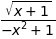

In [30]:
f = sqrt(x+1)/(1-x**2)
f

In [31]:
f.series(x, 0, 10)

In [32]:
xn = np.linspace(-.8, .8)
nrange = range(1, 6)
fs = [f.series(x, 0, n).removeO() for n in nrange]
fs

In [33]:
fns = [lambdify(x, ff) for ff in fs]
fn = lambdify(x, f)

In [34]:
fns[0](xn) # wir erwarten einen array

In [36]:
fns[0] = np.ones_like

In [37]:
plt.figure()
plt.plot(xn, fn(xn), label='f')
for n, ffs in zip(nrange, fns):
    plt.plot(xn, ffs(xn), label=n)
plt.legend();

Bei der Annäherung an den Pol wird die Approximation schlechter.

Das gilt selbst dann, wenn ich den Pol nicht sehen kann, weil er komplex ist.

In [38]:
f = atan(x)

In [39]:
nrange = [4, 20, 60]
fs = [f.series(x, 0, n).removeO() for n in nrange]
fs[1]

In [40]:
fns = [lambdify(x, ff, 'numpy') for ff in fs]
fn = lambdify(x, f)

In [41]:
plt.figure()
xn = np.linspace(-2, 2, 850)
plt.plot(xn, fn(xn), label='arctan')
for n, ffs in zip(nrange, fns):
    plt.plot(xn, ffs(xn), label=f"n={n}")
plt.axis(ymin=-1, ymax=2)
plt.legend();

Wie sieht der Arcustangens im komplexen aus?

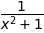

In [42]:
df = f.diff(x)
df

In [43]:
solve(denom(df))

In [44]:
xn = np.linspace(-1.5, 1.5, 200)
yn = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(xn, yn)
Z = X + 1j*Y

In [45]:
W = fn(Z)

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
levels = np.linspace(0, np.max(abs(W)), 300)
ax.contour(X, Y, abs(W), levels=levels);

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
R = W.real
levels = np.linspace(np.min(R), np.max(R), 300)
ax.contour(X, Y, R, levels=levels);

Logarithmische Singularität im Realteil

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Im = W.imag
levels = np.linspace(np.min(Im), np.max(Im), 300)
ax.contour(X, Y, Im, levels=levels);

Zum Vergleich

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
levels = np.linspace(-np.pi, np.pi, 300)
ax.contour(X, Y, np.log(Z).imag, levels=levels);

Falsche Zweigwahl ist die Ursache für viele Fehler in CAS

Potenzfunktionen

In [50]:
drei_halbe = Rational(3,2)
f = x**drei_halbe
f

In [52]:
f.subs(x, -1)

In [ ]:
#f.subs(x, -1.).real
# AttributeError:  symbolisch ist das die Funktion `re`

In [ ]:
re(f.subs(x, -1))

In [53]:
sqrt(-1)

In [54]:
I**3

In [55]:
(-1)**3

In [56]:
sqrt(-1)

$x^a = e^{a \log x}$

Damit ist $x^a$ für alle komplexen $a$ und für $x \in \mathbb C \setminus ]-\infty,0]$ erklärt.  (Für `sympy` sogar überall.)

In [57]:
log(-1)

In [59]:
zwei_drittel = Rational(2,3)

In [61]:
(-1.)**zwei_drittel

In [62]:
f = Piecewise((x**zwei_drittel, x >= 0), ((-x)**zwei_drittel, x < 0))
f

⎧  2/3             
⎪ x       for x ≥ 0
⎨                  
⎪    2/3           
⎩(-x)     otherwise

In [63]:
f.diff(x)

⎧    2               
⎪ ───────   for x ≥ 0
⎪   3 ___            
⎪ 3⋅╲╱ x             
⎨                    
⎪      2/3           
⎪2⋅(-x)              
⎪─────────  otherwise
⎩   3⋅x              

In [64]:
f.subs(x, -1)

In [65]:
H = Piecewise((1, x>=0), (0,x<0)) # reelle Werte für reelle x
H

⎧1  for x ≥ 0
⎨            
⎩0  otherwise

In [66]:
I1 = Integral(f, x)
I1

⌠                       
⎮ ⎧  2/3                
⎮ ⎪ x       for x ≥ 0   
⎮ ⎨                   dx
⎮ ⎪    2/3              
⎮ ⎩(-x)     otherwise   
⌡                       

In [69]:
I1.doit()

⎧       5/3            
⎪-3⋅(-x)               
⎪───────────  for x ≤ 0
⎪     5                
⎨                      
⎪     5/3              
⎪  3⋅x                 
⎪  ──────     otherwise
⎩    5                 